In [40]:
import pandas as pd
from pandas.plotting import lag_plot
import datetime as dt
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation, RepeatVector
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam,RMSprop
from keras.layers import LSTM, TimeDistributed
import math
import tensorflow as tf

print ('ok')

ok


In [41]:
dataset= pd.read_csv('../SentimentModel/Grouping/sahel_jun_aug_2020_grouped_sentiment-lip-cities.csv', index_col='date')

In [42]:
dataset.head()

,Unnamed: 0,month,day,hour,y_pred,count,pos,neg
date,,,,,,,,
2020-06-01 02:00:00,0,6,1,2,5,6,5,1
2020-06-01 03:00:00,1,6,1,3,13,17,13,4
2020-06-01 04:00:00,2,6,1,4,5,5,5,0
2020-06-01 05:00:00,3,6,1,5,0,1,0,1
2020-06-01 06:00:00,4,6,1,6,3,4,3,1


In [43]:
data = dataset[['pos','neg']]

In [44]:
data

,pos,neg
date,,
2020-06-01 02:00:00,5,1
2020-06-01 03:00:00,13,4
2020-06-01 04:00:00,5,0
2020-06-01 05:00:00,0,1
2020-06-01 06:00:00,3,1
...,...,...
2020-08-30 21:00:00,21,5
2020-08-30 22:00:00,10,3
2020-08-30 23:00:00,12,0


In [45]:
from sklearn.cluster import DBSCAN

In [46]:
dbscan=DBSCAN(eps=0.5, min_samples=4)
dbscan.fit(data[['neg']])

DBSCAN(min_samples=4)

In [47]:
labels = dbscan.labels_

In [48]:
labels

array([0, 1, 2, ..., 2, 3, 7])

In [49]:
import plotly.express as px
import plotly.graph_objects as go

In [50]:
data

,pos,neg
date,,
2020-06-01 02:00:00,5,1
2020-06-01 03:00:00,13,4
2020-06-01 04:00:00,5,0
2020-06-01 05:00:00,0,1
2020-06-01 06:00:00,3,1
...,...,...
2020-08-30 21:00:00,21,5
2020-08-30 22:00:00,10,3
2020-08-30 23:00:00,12,0


<ipython-input-51-04fde9a93d4e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



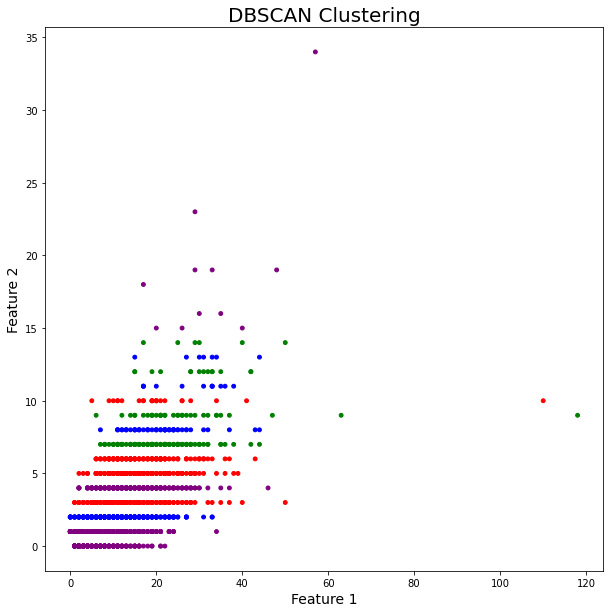

In [51]:
import matplotlib
from matplotlib.colors import ListedColormap
data['DBSCAN_labels']=dbscan.labels_ 
colors=['purple','red','blue','green']

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(data['pos'],data['neg'],c=data['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [71]:
outlier_pos = np.where(labels == -1)[0]

x = []; y = [];
for pos in outlier_pos:
    x.append(np.array(data[['neg']])[pos])
    y.append(data[['neg']].index[pos])
    
dfx= pd. DataFrame(x, columns=['anomalies'])
dfy= pd. DataFrame(y, columns=['date_anomalies'])

layout = go.Layout(
    width=1000,
    height=600,
)
fig = go.Figure(layout=layout)
fig = px.line(data[['neg']].loc[data[['neg']].index], title="Jul-Aug 2020")
fig.update_traces(line=dict(width=0.7))
fig.add_trace(go.Scatter(x=dfy['date_anomalies'], y=dfx['anomalies'], mode='markers', name='Anomaly'))
fig.update_xaxes(dtick="0",
                rangeslider_visible=True)
fig.update_layout(
   title = "DBSCAN Anomalies",
   xaxis_title = "date",
   yaxis_title = "count",
   font = dict(
      family = "Courier New, monospace",
      size = 10,
      color = "#7f7f7f"
   )

)

fig.show()

In [55]:
data

,pos,neg,DBSCAN_labels
date,,,
2020-06-01 02:00:00,5,1,0
2020-06-01 03:00:00,13,4,1
2020-06-01 04:00:00,5,0,2
2020-06-01 05:00:00,0,1,0
2020-06-01 06:00:00,3,1,0
...,...,...,...
2020-08-30 21:00:00,21,5,5
2020-08-30 22:00:00,10,3,3
2020-08-30 23:00:00,12,0,2


In [53]:
dfx

,anomalies
0,19
1,15
2,16
3,23
4,18
5,15
6,16
7,34
8,19
9,15


In [54]:
dfy

,date_anomalies
0,2020-06-03 21:00:00
1,2020-06-06 20:00:00
2,2020-06-07 13:00:00
3,2020-06-12 15:00:00
4,2020-06-13 12:00:00
5,2020-06-15 17:00:00
6,2020-07-31 19:00:00
7,2020-08-14 22:00:00
8,2020-08-14 23:00:00
9,2020-08-15 00:00:00


Text(0, 0.5, 'Neg')

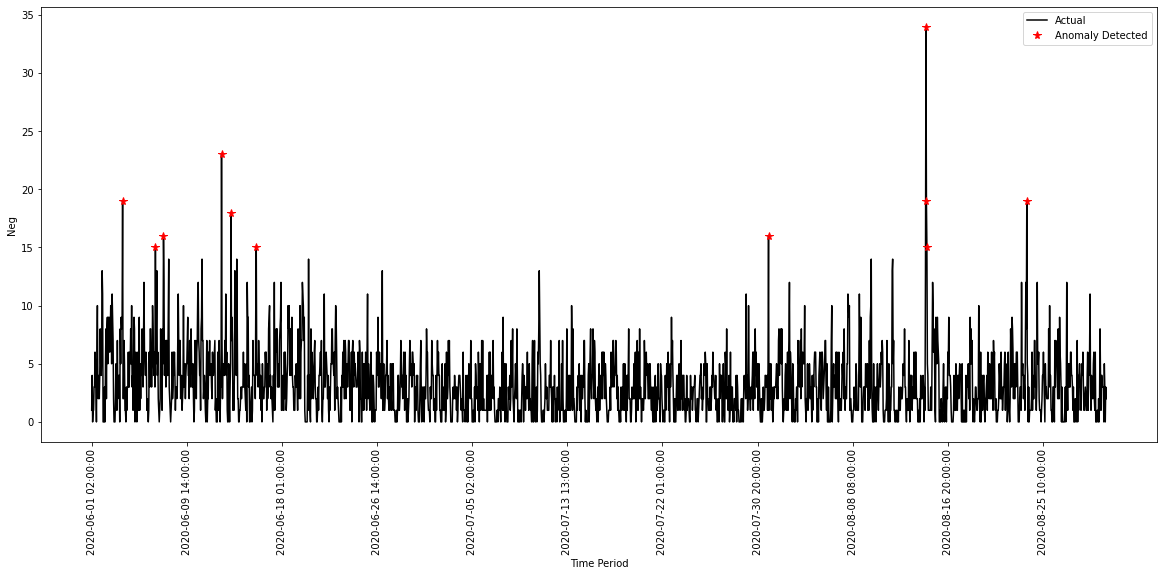

In [56]:
outlier_pos = np.where(labels == -1)[0]

x = []; y = [];
for pos in outlier_pos:
    x.append(np.array(data[['neg']])[pos])
    y.append(data[['neg']].index[pos])

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(data[['neg']].loc[data[['neg']].index], 'k-')
plt.plot(y,x,'r*', markersize=8)  
plt.legend(['Actual', 'Anomaly Detected'])
plt.xlabel('Time Period')
plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],[data.index.get_level_values('date')[0],data.index.get_level_values('date')[200], data.index.get_level_values('date')[400], data.index.get_level_values('date')[600], data.index.get_level_values('date')[800], data.index.get_level_values('date')[1000], data.index.get_level_values('date')[1200], data.index.get_level_values('date')[1400], data.index.get_level_values('date')[1600], data.index.get_level_values('date')[1800], data.index.get_level_values('date')[2000]] ,rotation=90)
plt.ylabel('Neg')

In [57]:
data.loc[data['DBSCAN_labels'] == -1]


,pos,neg,DBSCAN_labels
date,,,
2020-06-03 21:00:00,29,19,-1
2020-06-06 20:00:00,26,15,-1
2020-06-07 13:00:00,35,16,-1
2020-06-12 15:00:00,29,23,-1
2020-06-13 12:00:00,17,18,-1
2020-06-15 17:00:00,20,15,-1
2020-07-31 19:00:00,30,16,-1
2020-08-14 22:00:00,57,34,-1
2020-08-14 23:00:00,48,19,-1


In [58]:
pd.set_option('display.max_rows', None)

In [73]:
data

,pos,neg,DBSCAN_labels
date,,,
2020-06-01 02:00:00,5,1,0
2020-06-01 03:00:00,13,4,1
2020-06-01 04:00:00,5,0,2
2020-06-01 05:00:00,0,1,0
2020-06-01 06:00:00,3,1,0
2020-06-01 07:00:00,14,3,3
2020-06-01 08:00:00,17,3,3
2020-06-01 09:00:00,27,6,4
2020-06-01 10:00:00,16,5,5


In [74]:
data.to_csv('sahel_jun_aug_2020_DBscan-Lip-cities.csv')